In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import random

In [2]:
r_num = random.randint(0, 3353)
r_num

2360

In [3]:
if r_num < 10:
    r_num = f'000{r_num}'
elif r_num < 100:
    r_num = f'00{r_num}'
elif r_num < 1000:
    r_num = f'0{r_num}'

In [4]:
train_data = f'../dataset/train/train_normal_{r_num}.csv'

df = pd.read_csv(train_data)
bearing_x = df['bearingB_x']
bearing_y = df['bearingB_y']

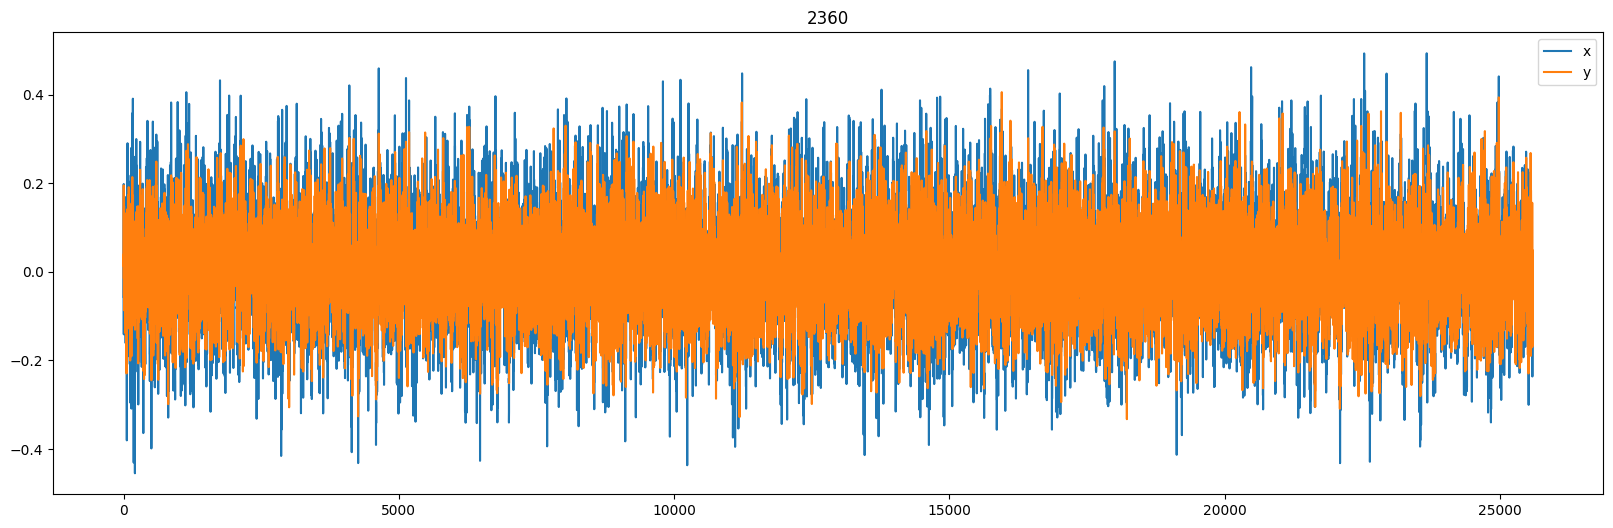

In [5]:
plt.figure(figsize=(20,6))
plt.plot(bearing_x, label='x')
plt.plot(bearing_y, label='y')
plt.title(r_num)
plt.legend()

In [6]:
n = len(bearing_x)
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T 
freq = freq[range(int(n/2))]
Y = np.fft.fft(bearing_x)/n 
Y = Y[range(int(n/2))]

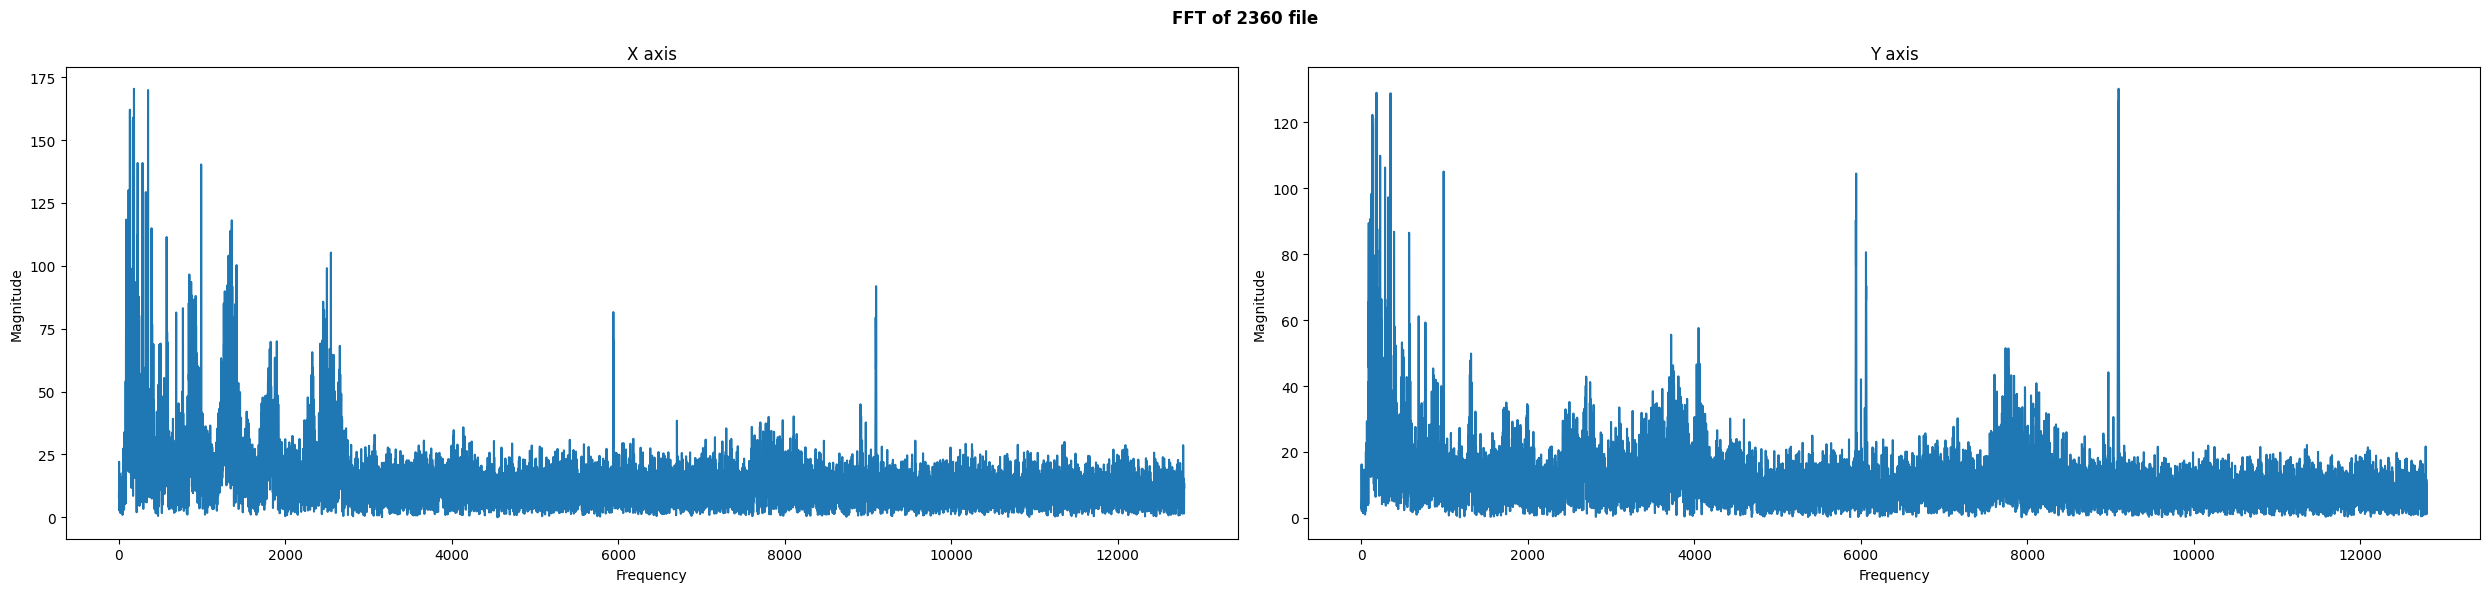

In [7]:
fft = np.fft.fft(bearing_x) 
magnitude = np.abs(fft)
frequency = np.linspace(0, 25600, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.figure(figsize=(25,6))
plt.suptitle(f'FFT of {r_num} file', fontweight='bold')


plt.subplot(1,2,1)
plt.plot(left_frequency, left_magnitude, label="Normal")

# plt.ylim((0,300))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("X axis")
# plt.show()

fft = np.fft.fft(bearing_y) 
magnitude = np.abs(fft)
frequency = np.linspace(0, 25600, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.subplot(1,2,2)
plt.plot(left_frequency, left_magnitude, label="Normal")

# plt.ylim((0,300))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Y axis")

plt.tight_layout()
plt.show()

In [8]:
# 히스토그램들

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from funs.databuilder import make_dataframe
from funs.painter import draw_hist
from funs.features import *

In [10]:
train_df = make_dataframe('../dataset/train')
eval_df = make_dataframe('../dataset/eval')

100%|██████████| 1679/1679 [00:06<00:00, 259.64it/s]


In [11]:
TDF_df = {}
TDF_df['fault_type'] = []
TDF_df['average'] = []
TDF_df['rms'] = []
TDF_df['peak'] = []
TDF_df['pk2pk'] = []
TDF_df['crest_factor'] = []
TDF_df['shape_factor'] = []
TDF_df['skewness'] = []
TDF_df['kurtosis'] = []

for idx, row in train_df.iterrows():
    TDF_df['average'].append(average(row['xdata']))
    TDF_df['rms'].append(rms(row['xdata']))
    TDF_df['peak'].append(peak(row['xdata']))
    TDF_df['pk2pk'].append(peak_to_peak(row['xdata']))
    TDF_df['crest_factor'].append(crest_factor(row['xdata']))
    TDF_df['shape_factor'].append(shape_factor(row['xdata']))
    TDF_df['skewness'].append(skewness(row['xdata']))
    TDF_df['kurtosis'].append(kurtsis(row['xdata']))
    TDF_df['fault_type'].append(row['fault_type'])

for idx, row in eval_df.iterrows():
    TDF_df['average'].append(average(row['xdata']))
    TDF_df['rms'].append(rms(row['xdata']))
    TDF_df['peak'].append(peak(row['xdata']))
    TDF_df['pk2pk'].append(peak_to_peak(row['xdata']))
    TDF_df['crest_factor'].append(crest_factor(row['xdata']))
    TDF_df['shape_factor'].append(shape_factor(row['xdata']))
    TDF_df['skewness'].append(skewness(row['xdata']))
    TDF_df['kurtosis'].append(kurtsis(row['xdata']))
    TDF_df['fault_type'].append(row['fault_type'])

TDF_df = pd.DataFrame(TDF_df)

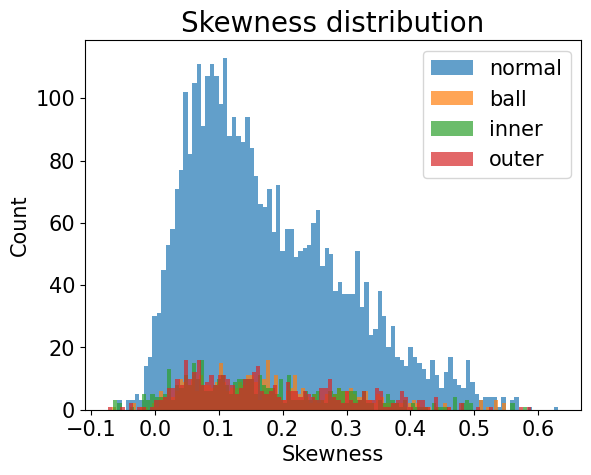

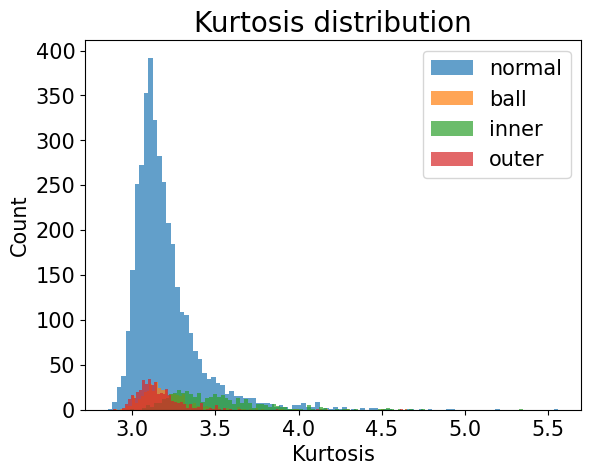

In [12]:
# draw_hist(TDF_df, 'average', 'Average distribution', 'Average', 'Count',(-0.01,0.01))
# draw_hist(TDF_df, 'peak', 'Peak distribution', 'Peak', 'Count', (0,2))
# draw_hist(TDF_df, 'pk2pk', 'Peak-to-peak distribution', 'Peak-to-peak', 'Count', (0,2))
# draw_hist(TDF_df, 'rms', 'RMS distribution', 'RMS', 'Count', (0, 0.5))
# draw_hist(TDF_df, 'crest_factor', 'Crest factor distribution', 'Crest factor', 'Count')
# draw_hist(TDF_df, 'shape_factor', 'Shape factor distribution', 'Shape factor', 'Count')
draw_hist(TDF_df, 'skewness', 'Skewness distribution', 'Skewness', 'Count')
draw_hist(TDF_df, 'kurtosis', 'Kurtosis distribution', 'Kurtosis', 'Count')